In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import seaborn as sns
#from tqdm._tqdm_notebook import tqdm_notebook

In [2]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [3]:
data.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
Serial No.           500 non-null int64
GRE Score            500 non-null int64
TOEFL Score          500 non-null int64
University Rating    500 non-null int64
SOP                  500 non-null float64
LOR                  500 non-null float64
CGPA                 500 non-null float64
Research             500 non-null int64
Chance of Admit      500 non-null float64
dtypes: float64(4), int64(5)
memory usage: 35.2 KB


In [5]:
data.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [6]:
data.shape

(500, 9)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14ecb794a8>,
      dtype=object)

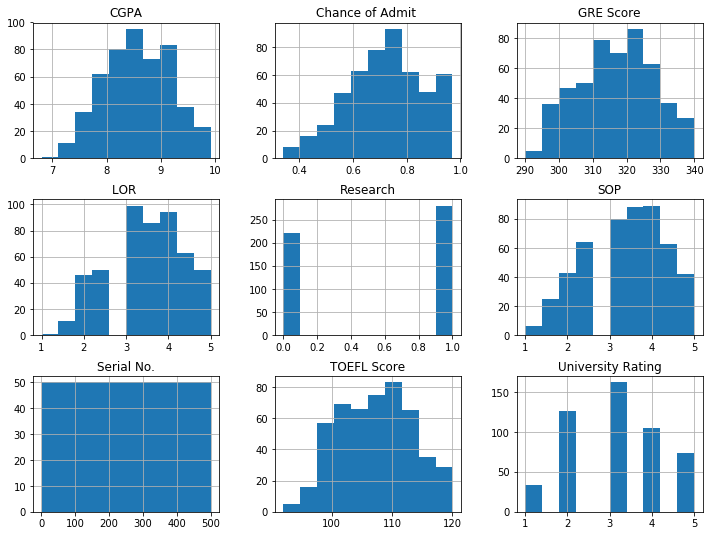

In [7]:
#plot histograms of each parameter
data.hist(figsize = (12,9))

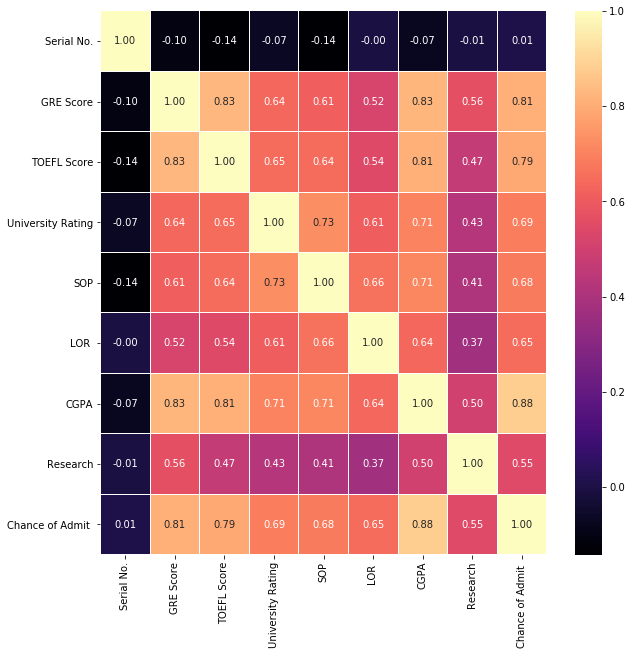

In [8]:
#Plot correlation matrix
#data.corr()
fig, ax = plt.subplots(figsize = (10,10))
sns.heatmap(data.corr(), ax =ax, annot = True, linewidths=0.05,fmt='.2f',cmap="magma")

# DATA VISUALIZATION
Comparing parameters to understand the data set

3 relations:
* How many students have research experience?
* GRE Score vs CGPA
* University Rating v Chance of Admit

Students with Research Exp: 280
Students without Research Exp: 220


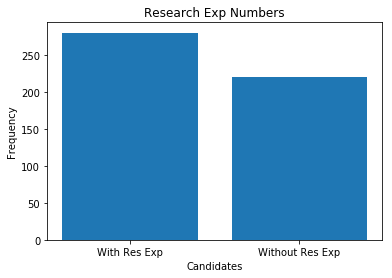

In [9]:
#Research experience

#Counting students with and without research experience
print("Students with Research Exp: {}".format(len(data[data.Research == 1])))
print("Students without Research Exp: {}".format(len(data[data.Research == 0])))

y = np.array([len(data[data.Research == 1]),len(data[data.Research == 0])])
x = ['With Res Exp','Without Res Exp'] 

plt.bar(x,y)
plt.title("Research Exp Numbers")
plt.xlabel("Candidates")
plt.ylabel("Frequency")
plt.show()

Text(0.5, 1.0, 'GRE Score vs CGPA')

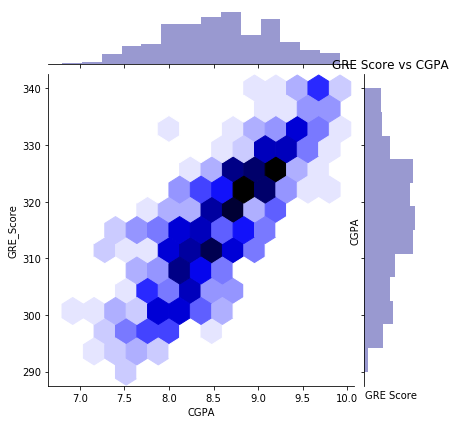

In [10]:
#Generally, students with higher GRE score have higher GPA
#Plot confirms above assumption
df = data
df.columns = [c.replace('GRE Score', 'GRE_Score') for c in df.columns]
sns.jointplot(x = 'CGPA', y = 'GRE_Score', color = 'darkblue', data = df, kind='hex')
plt.xlabel("GRE Score")
plt.ylabel("CGPA")
plt.title("GRE Score vs CGPA")

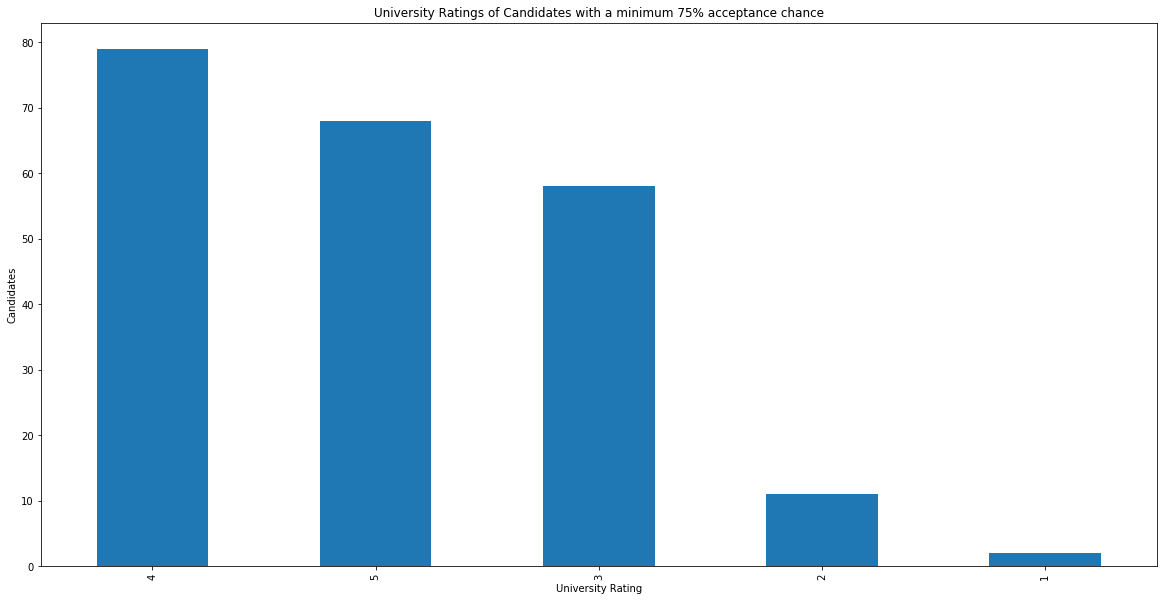

In [11]:
#Students from reputed universities have a better chance of getting accepted

s = data[data["Chance of Admit "] >= 0.75]["University Rating"].value_counts().head(5)
plt.title("University Ratings of Candidates with a minimum 75% acceptance chance")
s.plot(kind='bar',figsize=(20, 10))
plt.xlabel("University Rating")
plt.ylabel("Candidates")
plt.show()

# PREDICTION ALGORITHMS

* Linear Regression
* KNearest Neighbors
* Decision Tree
* Logistic Regression
* ANN

## Preprocessing

In [12]:
#drop serial no.
data.drop(["Serial No."], axis=1, inplace= True)

data=data.rename(columns = {'Chance of Admit ':'Chance of Admit'})

In [13]:
y = data["Chance of Admit"].values
x = data.drop(["Chance of Admit"],axis=1)

In [14]:
#Seperating training and test data
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2, random_state = 42)
x_train.head()

,GRE_Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research
249,321,111,3,3.5,4.0,8.83,1
433,316,111,4,4.0,5.0,8.54,0
19,303,102,3,3.5,3.0,8.50,0
322,314,107,2,2.5,4.0,8.27,0
332,308,106,3,3.5,2.5,8.21,1


In [15]:
from sklearn.preprocessing import MinMaxScaler

scalerX = MinMaxScaler(feature_range = (0,1))
x_train = scalerX.fit_transform(x_train[x_train.columns])
x_test = scalerX.fit_transform(x_test[x_test.columns])

/home/anant/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/home/anant/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


## Linear Regression

r2 score: 0.8090554752049318


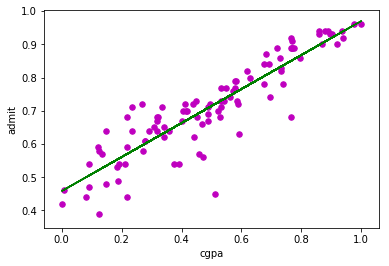

In [16]:
#CGPA has highest correlation (from heatmap)
cg = x_train[:,5]
y = y_train

from sklearn.metrics import r2_score

def estimate_coef(x, y): 
    n = np.size(x) 
    
    m_x, m_y = np.mean(x), np.mean(y) 
  
    SS_xy = np.sum(y*x) - n*m_y*m_x 
    SS_xx = np.sum(x*x) - n*m_x*m_x 
  
    # calculating regression coefficients 
    b_1 = SS_xy / SS_xx 
    b_0 = m_y - b_1*m_x 
  
    return(b_0, b_1)

def plot_line(x, y, b): 
    plt.scatter(x, y, color = "m", 
               marker = "o", s = 30) 
    y_pred = b[0] + b[1]*x
    #print("Test val: ", y)
    #print("Predictions: ", y_pred)
    print(f"r2 score: {r2_score(y,y_pred)}")
    plt.plot(x, y_pred, color = "g") 
    plt.xlabel('cgpa') 
    plt.ylabel('admit')  
    plt.show()

b = estimate_coef(x_test[:,5],y_test)
plot_line(x_test[:,5], y_test, b)

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

lr.fit(x_train,y_train)
y_pred_lr = lr.predict(x_test)

for i in range(0,(len(y_pred_lr)//10)):
    print(f"Real Val: {y_test[i]}\tPrediction: {y_pred_lr[i]}")

Real Val: 0.93	Prediction: 0.92301681881667
Real Val: 0.84	Prediction: 0.786563221708362
Real Val: 0.39	Prediction: 0.5249766872690043
Real Val: 0.77	Prediction: 0.6904507732110425
Real Val: 0.74	Prediction: 0.8101652583427394
Real Val: 0.89	Prediction: 0.859516575351676
Real Val: 0.47	Prediction: 0.42471975356915065
Real Val: 0.57	Prediction: 0.6246156075493832
Real Val: 0.68	Prediction: 0.8207144291847863
Real Val: 0.82	Prediction: 0.7927291514793107


In [18]:
from sklearn.metrics import r2_score

print(f"r_squared_score: {r2_score(y_test,y_pred_lr)}")

r_squared_score: 0.7855357095907826


<Figure size 1296x1440 with 0 Axes>

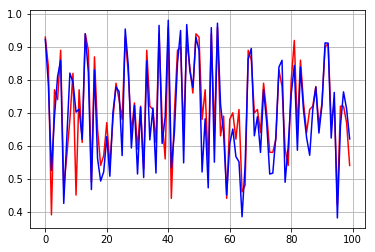

<Figure size 1296x1440 with 0 Axes>

In [19]:
#Plotting predicted values alongside actual values

plt.plot(y_test, 'r', y_pred_lr, 'b')
plt.grid()
plt.figure(figsize=(18,20))

## K-Nearest Neighbors

In [20]:
#Create labels for each training and test sample
import math
y_train_knn = []
for i in range(0,len(y_train)):
    y_train_knn.append(math.floor(y_train[i]*10))
    
y_test_knn = []
for i in range(0,len(y_test)):
    y_test_knn.append(math.floor(y_test[i]*10))
#print(y_train_knn, y_train, sep='\n')

In [21]:
from sklearn.neighbors import KNeighborsClassifier

k = 4

neigh = KNeighborsClassifier(n_neighbors=k).fit(x_train, y_train_knn)
neigh

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=4, p=2,
           weights='uniform')

In [22]:
#Predicting

y_hat = neigh.predict(x_test)

#Accuracy Score
from sklearn.metrics import accuracy_score
print("Train Accuracy Score: ", accuracy_score(y_train_knn, neigh.predict(x_train)))
print("Test Accuracy Score: ", accuracy_score(y_test_knn, y_hat))

Train Accuracy Score:  0.665
Test Accuracy Score:  0.55


In [23]:
#Performing KNN for all k = 1 to 10

Ks = 10
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(x_train,y_train_knn)
    yhat=neigh.predict(x_test)
    mean_acc[n-1] = accuracy_score(y_test_knn, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test_knn)/np.sqrt(yhat.shape[0])

mean_acc

array([0.5 , 0.46, 0.52, 0.55, 0.56, 0.59, 0.61, 0.62, 0.6 ])

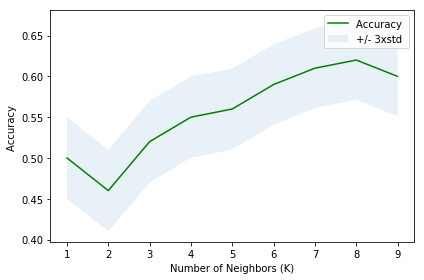

In [24]:
#Plotting accuracies with different K values

plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [25]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.62 with k= 8


## Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier
dty_train = []
dty_test = []
dty_train = y_train_knn
dty_test = y_test_knn
print(len(dty_train), len(dty_test))

400 100


In [27]:
admitTree = DecisionTreeClassifier(criterion="entropy", max_depth = 7)
admitTree # it shows the default parameters

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [28]:
admitTree.fit(x_train, dty_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [29]:
#make predictions
predTree = admitTree.predict(x_test)

In [30]:
print(predTree[0:5])
print(dty_test[0:5])

[9 7 5 6 8]
[9, 8, 3, 7, 7]


In [31]:
#Evaluation
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(dty_test, predTree))

DecisionTrees's Accuracy:  0.48


In [32]:
#Accuracy score w/o sklearn
sum = 0
for i in range(0, len(predTree)):
    if predTree[i] == dty_test[i]:
        sum+=1
print("DecisionTrees's Accuracy: ", sum/100)

DecisionTrees's Accuracy:  0.48


## Logistic Regression

In [33]:
from sklearn.linear_model import LogisticRegression

In [34]:
#Converting the predictive variable to binary 0 or 1
logy_train = []
logy_test = []
for i in range(0, len(y_train)):
    if y_train[i] >= 0.75:
        logy_train.append(1)
    else:
        logy_train.append(0)
logy_train = np.array(logy_train)

for i in range(0, len(y_test)):
    if y_test[i] >= 0.75:
        logy_test.append(1)
    else:
        logy_test.append(0)
logy_test = np.array(logy_test)

#print(logy_train[:10], y_train[:10])

In [36]:
log_x = x_train
logReg = LogisticRegression()
a = logReg.fit(log_x, logy_train)

/home/anant/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [37]:
y_hat = logReg.predict(x_test)
print(y_hat[:10])

[1 1 0 0 1 1 0 0 1 1]


In [38]:
sum = 0
for i in range(0, len(y_hat)):
    if y_hat[i] == logy_test[i]:
        sum+=1
print("Logistic Regression's Accuracy: ", sum/100)

Logistic Regression's Accuracy:  0.86


<Figure size 7200x7200 with 0 Axes>

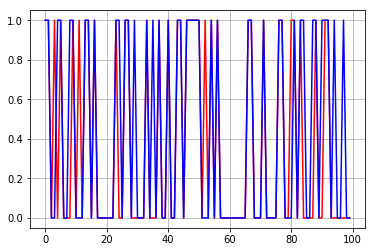

<Figure size 7200x7200 with 0 Axes>

In [39]:
#Plotting predicted values alongside actual values

plt.plot(logy_test, 'r', y_hat, 'b')
plt.grid()
plt.figure(figsize=(100,100))

## ANN

In [40]:
data = pd.read_csv('Admission_Predict_Ver1.1.csv')

In [41]:
data.columns = [c.replace(' ', '_') for c in data.columns]
data.columns = [c.replace('LOR_', 'LOR') for c in data.columns]
data.columns = [c.replace('Chance_of_Admit_', 'Chance_of_Admit') for c in data.columns]
data.columns = [c.replace('Chance_of_Admit', 'Admit') for c in data.columns]
data.head()

,Serial_No.,GRE_Score,TOEFL_Score,University_Rating,SOP,LOR,CGPA,Research,Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [42]:
#Converting chance of admit to either 1 or 0
data.loc[data['Admit']>=0.75,['Admit']]=1
data.loc[data['Admit']<0.75,['Admit']]=0

In [43]:
import keras

X=data[['GRE_Score','TOEFL_Score','University_Rating','SOP','LOR','CGPA','Research']]
# labels y are one-hot encoded, so it appears as two classes 
y = keras.utils.to_categorical(np.array(data["Admit"]))
X = scalerX.fit_transform(X[X.columns])

Using TensorFlow backend.
/home/anant/.local/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [44]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

/home/anant/.local/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2179: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [45]:
#Defining a simple model

from keras.models import Sequential
from keras.layers.core import Dense, Activation


model = Sequential()
model.add(Dense(128, input_dim=7, activation='sigmoid'))
model.add(Dense(32, activation='sigmoid'))
model.add(Dense(2, activation='sigmoid'))
model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 128)               1024      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_3 (Dense)              (None, 2)                 66        
Total params: 5,218
Trainable params: 5,218
Non-trainable params: 0
_________________________________________________________________


In [46]:
#Training

model.fit(X_train, y_train, epochs=100, verbose=1)

Epoch 1/100
350/350 [==============================] - 0s 538us/step - loss: 0.6856 - acc: 0.5571
Epoch 2/100
350/350 [==============================] - 0s 58us/step - loss: 0.6809 - acc: 0.5571
Epoch 3/100
350/350 [==============================] - 0s 69us/step - loss: 0.6737 - acc: 0.5571
Epoch 4/100
350/350 [==============================] - 0s 58us/step - loss: 0.6687 - acc: 0.5571
Epoch 5/100
350/350 [==============================] - 0s 73us/step - loss: 0.6608 - acc: 0.5571
Epoch 6/100
350/350 [==============================] - 0s 54us/step - loss: 0.6560 - acc: 0.5571
Epoch 7/100
350/350 [==============================] - 0s 69us/step - loss: 0.6383 - acc: 0.6314
Epoch 8/100
350/350 [==============================] - 0s 70us/step - loss: 0.6289 - acc: 0.7686
Epoch 9/100
350/350 [==============================] - 0s 64us/step - loss: 0.6131 - acc: 0.7857
Epoch 10/100
350/350 [==============================] - 0s 52us/step - loss: 0.6028 - acc: 0.6200
Epoch 11/100
350/350 [======

350/350 [==============================] - 0s 77us/step - loss: 0.2622 - acc: 0.8657
Epoch 85/100
350/350 [==============================] - 0s 45us/step - loss: 0.2617 - acc: 0.8686
Epoch 86/100
350/350 [==============================] - 0s 47us/step - loss: 0.2636 - acc: 0.8800
Epoch 87/100
350/350 [==============================] - 0s 80us/step - loss: 0.2616 - acc: 0.8686
Epoch 88/100
350/350 [==============================] - 0s 51us/step - loss: 0.2626 - acc: 0.8686
Epoch 89/100
350/350 [==============================] - 0s 54us/step - loss: 0.2596 - acc: 0.8657
Epoch 90/100
350/350 [==============================] - 0s 62us/step - loss: 0.2611 - acc: 0.8686
Epoch 91/100
350/350 [==============================] - 0s 59us/step - loss: 0.2647 - acc: 0.8657
Epoch 92/100
350/350 [==============================] - 0s 61us/step - loss: 0.2682 - acc: 0.8657
Epoch 93/100
350/350 [==============================] - 0s 58us/step - loss: 0.2624 - acc: 0.8686
Epoch 94/100
350/350 [===========

In [47]:
print("ANN Score: ", model.evaluate(X_test, y_test))

150/150 [==============================] - 0s 325us/step
ANN Score:  [0.2495400643348694, 0.9000000015894571]
